In [1]:
import torch
import torch.nn as nn
from torch.nn import init
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch import optim
import numpy as np
!nvidia-smi
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

Wed Jan  6 13:20:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# 先定義好下載了的MNIST data 要有什麼處理。
# 這兒有兩個動作 (1)convert成PyTorch的tensor 
# (2)基於mean=0.5, std=0.5 進行normalization, 注意!因為是單色相片，只有一
# 個值，如果是RGB相，會是 (0.5,0.5,0.5) 
# ----------------------------------------
_tasks = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize(mean=(0.5,), std=(0.5,))
        ])
# 告訴它，你要下載到'data'檔案夾中。
# ----------------------------------------
mnist = MNIST("data", download=True, train=True, transform=_tasks)

In [3]:
split = int(0.8 * len(mnist))
index_list = list(range(len(mnist)))
train_idx, valid_idx = index_list[:split], index_list[split:]
# 用 SubsetRandomSampler，可向它拿取一個 random 的 element.
# ----------------------------------------
tr_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(valid_idx)
# train_idx 有 48000 個 element
# valid_idx 有 12000 個 element
# 以下batch_size=256,即48000 element 中每次抽256個 samples 出來train。
#     它們產生的error, 平均了之後才去update weight。
# 以下batch_size=256,即12000 element 中每次抽256個 samples 出來train。
#     它們產生的error, 平均了之後才去update weight。
# ----------------------------------------
trainloader = DataLoader(mnist, batch_size=256, sampler=tr_sampler) 
validloader = DataLoader(mnist, batch_size=256, sampler=val_sampler)

In [4]:
class Model_orthogonal(nn.Module):  # 必要 inherit nn.Module
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 512)
        self.l2 = nn.Linear(512,512)
        self.l3 = nn.Linear(512,512)
        self.l4 = nn.Linear(512,256)
        self.l5 = nn.Linear(256,256)
        self.l6 = nn.Linear(256,256)
        self.l7 = nn.Linear(256,128)
        self.l8 = nn.Linear(128,128)
        self.l9 = nn.Linear(128,128)
        self.l10 = nn.Linear(128,64)
        self.l11 = nn.Linear(64,64)
        self.output = nn.Linear(64, 10)
        for weight in self.l1.parameters():
            if len(weight.size()) > 1:
              print(weight)
              init.orthogonal(weight.data)
        for weight in self.l2.parameters():
            if len(weight.size()) > 1:
              print(weight)
              init.orthogonal(weight.data)
        for weight in self.l3.parameters():
            if len(weight.size()) > 1:
              print(weight)
              init.orthogonal(weight.data)
        for weight in self.l4.parameters():
            if len(weight.size()) > 1:
              print(weight)
              init.orthogonal(weight.data)
        for weight in self.l5.parameters():
            if len(weight.size()) > 1:
              print(weight)
              init.orthogonal(weight.data)
        for weight in self.l6.parameters():
            if len(weight.size()) > 1:
              print(weight)
              init.orthogonal(weight.data)
        for weight in self.l7.parameters():
            if len(weight.size()) > 1:
              print(weight)
              init.orthogonal(weight.data)
        for weight in self.l8.parameters():
            if len(weight.size()) > 1:
              print(weight)
              init.orthogonal(weight.data)
        for weight in self.l9.parameters():
            if len(weight.size()) > 1:
              print(weight)
              init.orthogonal(weight.data)
        for weight in self.l10.parameters():
            if len(weight.size()) > 1:
              print(weight)
              init.orthogonal(weight.data)
        for weight in self.l11.parameters():
            if len(weight.size()) > 1:
              print(weight)
              init.orthogonal(weight.data)
        for weight in self.output.parameters():
            if len(weight.size()) > 1:
              print(weight)
              init.orthogonal(weight.data)

    def forward(self, x):
        x = self.l1(x)
        # y = x
        x = self.l2(x)
        x = self.l3(x)
        x = self.l4(x) 
        x = self.l5(x)
        # y = x
        x = self.l6(x)
        x = self.l7(x)
        x = self.l8(x)  
        # y = x   
        x = self.l9(x)  
        x = self.l10(x)
        x = self.l11(x)
        y = x
        x = torch.sigmoid(x)
        x = self.output(x)
        return x, y

class Model_original(nn.Module):  # 必要 inherit nn.Module
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 512)
        self.l2 = nn.Linear(512,512)
        self.l3 = nn.Linear(512,512)
        self.l4 = nn.Linear(512,256)
        self.l5 = nn.Linear(256,256)
        self.l6 = nn.Linear(256,256)
        self.l7 = nn.Linear(256,128)
        self.l8 = nn.Linear(128,128)
        self.l9 = nn.Linear(128,128)
        self.l10 = nn.Linear(128,64)
        self.l11 = nn.Linear(64,64)
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = self.l1(x)
        # y = x
        x = self.l2(x)
        x = self.l3(x)
        x = self.l4(x) 
        x = self.l5(x)
        # y = x
        x = self.l6(x)
        x = self.l7(x)
        x = self.l8(x) 
        # y = x    
        x = self.l9(x)  
        x = self.l10(x)
        x = self.l11(x)
        y = x
        x = torch.sigmoid(x)
        x = self.output(x)
        return x, y
model_orthogonal = Model_orthogonal().to(device)
model_original = Model_original().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer_orthogonal = optim.SGD(model_orthogonal.parameters(), lr=0.01, weight_decay= 1e-6, momentum = 0.9, nesterov = True)
optimizer_original = optim.SGD(model_original.parameters(), lr=0.01, weight_decay= 1e-6, momentum = 0.9, nesterov = True)

Parameter containing:
tensor([[-2.7137e-02, -6.2638e-03,  1.5013e-02,  ...,  2.1891e-02,
         -4.2701e-03,  2.2696e-02],
        [ 7.0279e-03, -2.5197e-02, -1.5161e-05,  ...,  2.4452e-02,
         -2.3738e-03, -5.2855e-04],
        [ 3.1213e-02, -1.4673e-02,  3.0330e-02,  ...,  2.0813e-02,
          2.2770e-02, -1.3610e-02],
        ...,
        [ 8.6127e-03, -1.4236e-02, -2.0011e-02,  ...,  6.1555e-03,
         -2.0036e-02, -2.7336e-02],
        [-1.2876e-02, -4.3095e-04,  2.8239e-02,  ...,  2.1253e-02,
         -1.8849e-02,  3.1241e-02],
        [-1.8918e-02,  6.0452e-03,  1.0942e-02,  ..., -3.5014e-02,
         -3.1039e-02,  3.5611e-02]], requires_grad=True)
Parameter containing:
tensor([[ 0.0337,  0.0136, -0.0124,  ...,  0.0045,  0.0195,  0.0114],
        [-0.0016,  0.0103,  0.0313,  ..., -0.0300, -0.0364, -0.0388],
        [ 0.0095, -0.0183, -0.0302,  ..., -0.0163, -0.0387,  0.0429],
        ...,
        [ 0.0326, -0.0399,  0.0321,  ..., -0.0379, -0.0008, -0.0088],
        [ 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: nn.init.orthogonal is now deprecat

In [5]:

Orthogonal_loss = []

index = 0
for epoch in range(1, 2): 
    train_loss, valid_loss = [], []
    ## 把 model 調去 training mode;##
    model_orthogonal.train()
    ## trainloader 中的每個batch 有256個 samples. ##
    for data, target in trainloader: 
        data, target = data.to(device), target.to(device)
        optimizer_orthogonal.zero_grad()     #optimizer 中的gradient 先歸零.# 
        ## 1. forward propagation
        ## -----------------------
        
        #把本來 torch.Size([256, 1, 28, 28])
        #用 .view transform 成 torch.Size([256, 784])
        data = data.view(data.size(0),-1)
        #這個class 是callable 的。而每次call 都會運行 forward().
        #自Appendix 1. 
        output, layer1 = model_orthogonal(data)
        if index == 0:
            ans = layer1
            index += 1
        ## 2. loss calculation
        ## -----------------------
        loss = loss_function(output, target)
        
        ## 3. backward propagation
        ## -----------------------
        #是不是很神，為什麼loss.backward() 就backward propagation 了，
        #它知道要backward 給誰嗎? 是的，它就是知道。請看 blog [ML13]
        loss.backward()              
        
        ## 4. weight optimization
        ## -----------------------        
        optimizer_orthogonal.step()
        train_loss.append(loss.item())
        Orthogonal_loss.append(loss.item())
        # N_loss.append(loss.item())
        ## evaluation part 
        ## 把 model 調去 training mode;
        # model.eval()
        # for data, target in validloader:
        #     data, target = data.to(device), target.to(device)
        #     data = data.view(data.size(0),-1)
        #     output = model(data)
        #     loss = loss_function(output, target)
        #     valid_loss.append(loss.item())
        print("Epoch:", epoch, "Training Loss: ", np.mean(train_loss))
ans = ans.cpu().detach().numpy()

orthogonal_len = []
for i in range(len(ans)):
    orthogonal_len.append(np.linalg.norm(ans[i]))

Epoch: 1 Training Loss:  2.47900652885437
Epoch: 1 Training Loss:  2.4213955402374268
Epoch: 1 Training Loss:  2.4005935192108154
Epoch: 1 Training Loss:  2.3674169778823853
Epoch: 1 Training Loss:  2.33929181098938
Epoch: 1 Training Loss:  2.3152111371358237
Epoch: 1 Training Loss:  2.293343884604318
Epoch: 1 Training Loss:  2.2711901664733887
Epoch: 1 Training Loss:  2.2472413380940757
Epoch: 1 Training Loss:  2.223296546936035
Epoch: 1 Training Loss:  2.201702052896673
Epoch: 1 Training Loss:  2.1784486969312034
Epoch: 1 Training Loss:  2.157641585056598
Epoch: 1 Training Loss:  2.132971772125789
Epoch: 1 Training Loss:  2.1073185125986735
Epoch: 1 Training Loss:  2.08442060649395
Epoch: 1 Training Loss:  2.0614706838832184
Epoch: 1 Training Loss:  2.037626372443305
Epoch: 1 Training Loss:  2.0115961903019954
Epoch: 1 Training Loss:  1.988586163520813
Epoch: 1 Training Loss:  1.962777745156061
Epoch: 1 Training Loss:  1.9385517185384578
Epoch: 1 Training Loss:  1.9152368929075159
Ep

In [6]:
Original_loss = []
index = 0
for epoch in range(1, 2): 
    train_loss, valid_loss = [], []
    ## 把 model 調去 training mode;##
    model_original.train()
    ## trainloader 中的每個batch 有256個 samples. ##
    for data, target in trainloader: 
        data, target = data.to(device), target.to(device)
        optimizer_original.zero_grad()     #optimizer 中的gradient 先歸零.# 
        ## 1. forward propagation
        ## -----------------------
        
        #把本來 torch.Size([256, 1, 28, 28])
        #用 .view transform 成 torch.Size([256, 784])
        data = data.view(data.size(0),-1)
        #這個class 是callable 的。而每次call 都會運行 forward().
        #自Appendix 1. 
        output, layer1 = model_original(data)
        if index == 0:
            ans = layer1
            index += 1
        ## 2. loss calculation
        ## -----------------------
        loss = loss_function(output, target)
        
        ## 3. backward propagation
        ## -----------------------
        #是不是很神，為什麼loss.backward() 就backward propagation 了，
        #它知道要backward 給誰嗎? 是的，它就是知道。請看 blog [ML13]
        loss.backward()              
        
        ## 4. weight optimization
        ## -----------------------        
        optimizer_original.step()
        train_loss.append(loss.item())
        Original_loss.append(loss.item())
        # N_loss.append(loss.item())
        ## evaluation part 
        ## 把 model 調去 training mode;
        # model.eval()
        # for data, target in validloader:
        #     data, target = data.to(device), target.to(device)
        #     data = data.view(data.size(0),-1)
        #     output = model(data)
        #     loss = loss_function(output, target)
        #     valid_loss.append(loss.item())
        print("Epoch:", epoch, "Training Loss: ", np.mean(train_loss))
ans = ans.cpu().detach().numpy()

original_len = []
for i in range(len(ans)):
    original_len.append(np.linalg.norm(ans[i]))

Epoch: 1 Training Loss:  2.3253114223480225
Epoch: 1 Training Loss:  2.32443904876709
Epoch: 1 Training Loss:  2.3369344075520835
Epoch: 1 Training Loss:  2.332468569278717
Epoch: 1 Training Loss:  2.3318143844604493
Epoch: 1 Training Loss:  2.3302494287490845
Epoch: 1 Training Loss:  2.3295651503971646
Epoch: 1 Training Loss:  2.3266738057136536
Epoch: 1 Training Loss:  2.3229799535539417
Epoch: 1 Training Loss:  2.3209434747695923
Epoch: 1 Training Loss:  2.3193073706193403
Epoch: 1 Training Loss:  2.317053218682607
Epoch: 1 Training Loss:  2.3161062460679274
Epoch: 1 Training Loss:  2.3149012497493198
Epoch: 1 Training Loss:  2.3140228112538654
Epoch: 1 Training Loss:  2.3128803372383118
Epoch: 1 Training Loss:  2.312914119047277
Epoch: 1 Training Loss:  2.312743478351169
Epoch: 1 Training Loss:  2.311980824721487
Epoch: 1 Training Loss:  2.311564552783966
Epoch: 1 Training Loss:  2.3107134387606667
Epoch: 1 Training Loss:  2.310398437760093
Epoch: 1 Training Loss:  2.30978740816530

Start to plot!!


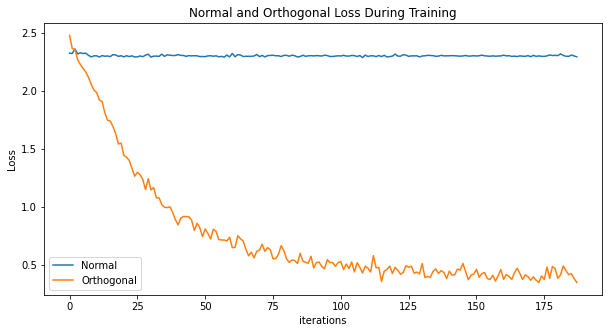

In [7]:
import matplotlib.pyplot as plt
def plotImage(G_losses, D_losses):
    print('Start to plot!!')
    plt.figure(figsize=(10, 5))
    plt.title("Normal and Orthogonal Loss During Training")
    plt.plot(G_losses, label="Normal")
    plt.plot(D_losses, label="Orthogonal")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

plotImage(Original_loss, Orthogonal_loss)

Start to plot!!


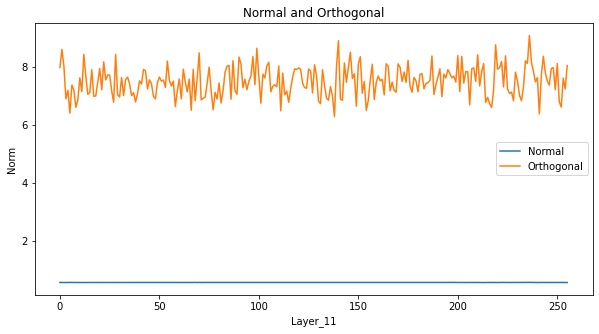

In [8]:
def plotImage(G_len, D_len):
    print('Start to plot!!')
    plt.figure(figsize=(10, 5))
    plt.title("Normal and Orthogonal")
    plt.plot(G_len, label="Normal")
    plt.plot(D_len, label="Orthogonal")
    plt.xlabel("Layer_11")
    plt.ylabel("Norm")
    plt.legend()
    plt.show()

plotImage(original_len, orthogonal_len)

In [9]:
## dataloader for validation dataset 
dataiter = iter(validloader)
correct = 0
total = 0
for i in range(len(dataiter)):
    data, labels = dataiter.next()
    data = data.to(device)
    data = data.view(data.size(0),-1)
    output, _ = model_original(data)
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.cpu().numpy())
    for j in range(len(preds)):
      if preds[j] == labels[j]:
          correct += 1
      total += 1
    # print ("Actual:", labels[:])
    # print ("Predicted:", preds[:])
print('total : ', total)
print('Original acc : ', correct/total)

dataiter = iter(validloader)
correct = 0
total = 0
for i in range(len(dataiter)):
    data, labels = dataiter.next()
    data = data.to(device)
    data = data.view(data.size(0),-1)
    output, _ = model_orthogonal(data)
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.cpu().numpy())
    for j in range(len(preds)):
      if preds[j] == labels[j]:
          correct += 1
      total += 1
    # print ("Actual:", labels[:])
    # print ("Predicted:", preds[:])
print('total : ', total)
print('Orthogonal acc : ', correct/total)

#90.6%

total :  12000
Original acc :  0.0975
total :  12000
Orthogonal acc :  0.9103333333333333
